In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base de datos y limpieza

In [ ]:
df = pd.read_parquet("24o_medicom.parquet")

In [ ]:
df.head()

,fecha,id_material,id_cliente,ventas
0,2013-05-06,768,7939,384.000000000
1,2011-09-20,768,7939,384.000000000
2,2014-01-08,768,7939,384.000000000
3,2011-04-19,768,7939,384.000000000
4,2013-03-21,768,7805,384.000000000


In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])

cutoff_date = '2021-01-01'

df = df[df['fecha'] >= cutoff_date]

In [ ]:
df.head()

,fecha,id_material,id_cliente,ventas
10,2023-01-24,768,9066,-484.920000000
11,2023-07-15,768,8934,346.000000000
12,2024-01-31,768,8047,346.000000000
103,2024-05-13,768,9066,-183.380000000
107,2022-10-21,768,7680,323.280000000


In [ ]:
#df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227795 entries, 10 to 830516
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        227795 non-null  datetime64[ns]
 1   id_material  227795 non-null  int64         
 2   id_cliente   227795 non-null  int64         
 3   ventas       227795 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.7+ MB


In [ ]:
counts = df["id_material"].value_counts()
non_unique_materials = counts[counts > 1].index
df= df[df["id_material"].isin(non_unique_materials)]
df["id_material"].info()

<class 'pandas.core.series.Series'>
Index: 227725 entries, 10 to 830516
Series name: id_material
Non-Null Count   Dtype
--------------   -----
227725 non-null  int64
dtypes: int64(1)
memory usage: 3.5 MB


In [ ]:
df.to_csv('output.csv', index=False)


#Datos por total de ventas

Id del material ordendo por el mayor número total de dinero obtenido

In [ ]:
setventas=df["id_material"].drop_duplicates()
setventas = setventas.reset_index(drop=True)
ventasporproducto=[]
for i in range (len(setventas)):
  ventasporproducto.append(df["ventas"][df["id_material"] == setventas[i]].values.sum())

ventastot = {
  "id_material": setventas,
  "ventas totales": ventasporproducto
}
ventastot=pd.DataFrame.from_dict(ventastot)
ventastot = ventastot.sort_values(by='ventas totales', ascending=False)
ventastot = ventastot.reset_index(drop=True)
ventastot.head(10)

,id_material,ventas totales
0,591,97903712.020000000
1,601,84710470.410000000
2,893,84654422.810000000
3,590,78186308.770000000
4,772,77445106.930000000
5,5862,45806524.430000000
6,600,44405786.530000000
7,817,43288174.570000000
8,724,28079135.380000000
9,670,27697462.240000000


Id de los 10 materiales con menos dinero generado en total

In [ ]:
df['ventas'] = df['ventas']#.astype(object)
ventas_ordenadas_df = df.sort_values(by='ventas')[['id_material','fecha', 'ventas']]
ventas_ordenadas_df.head(10)
import pandas as pd
bottom_10_ventas = ventas_ordenadas_df.head(10)
bottom_10_ventas_df = pd.DataFrame(bottom_10_ventas)
bottom_10_ventas_df


,id_material,fecha,ventas
122197,6435,2022-03-11,-1149758.280000000
421567,7784,2024-05-13,-664411.000000000
655441,7107,2023-04-06,-650808.000000000
578052,673,2021-03-10,-625922.540000000
772613,749,2023-05-23,-623521.800000000
122196,6435,2024-04-07,-599445.000000000
289870,591,2021-03-10,-443100.000000000
421562,7784,2024-01-25,-428985.340000000
421577,7784,2024-08-02,-405042.000000000
184223,825,2021-03-10,-386812.800000000


In [ ]:
ventasbajas_ordenadas_df = ventas_ordenadas_df[ventas_ordenadas_df["ventas"] > 0]
ventasbajas = ventasbajas_ordenadas_df.head(10)
ventasbajas

,id_material,fecha,ventas
74645,3854,2024-05-27,0.860000000
603124,949,2022-03-18,7.840000000
705979,2267,2021-10-14,7.960000000
500480,893,2022-01-13,8.190000000
500479,893,2021-10-04,8.190000000
500478,893,2021-02-10,8.190000000
499278,893,2022-06-09,8.680000000
499279,893,2022-05-13,8.680000000
499611,893,2021-07-13,8.700000000
498794,893,2023-10-14,9.120000000


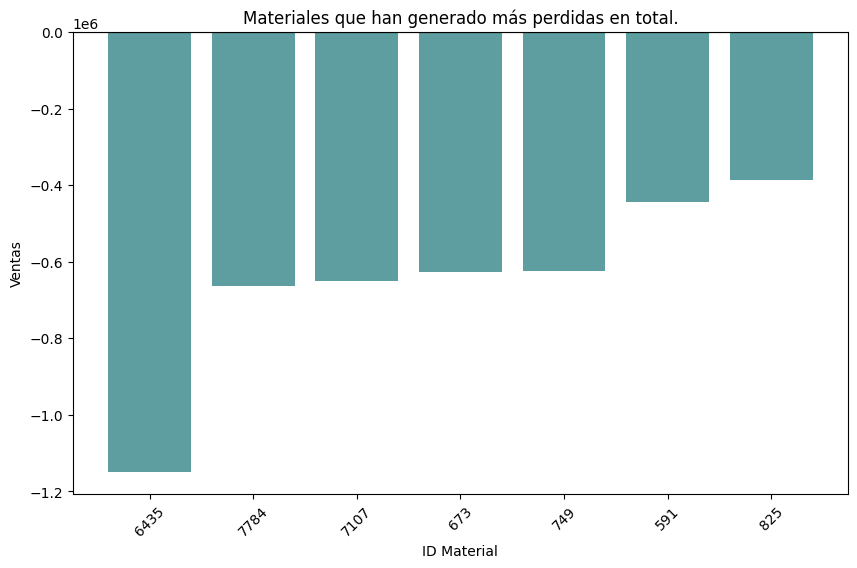

In [ ]:
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_ventas_df['id_material'].astype(str), bottom_10_ventas_df['ventas'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado más perdidas en total.')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

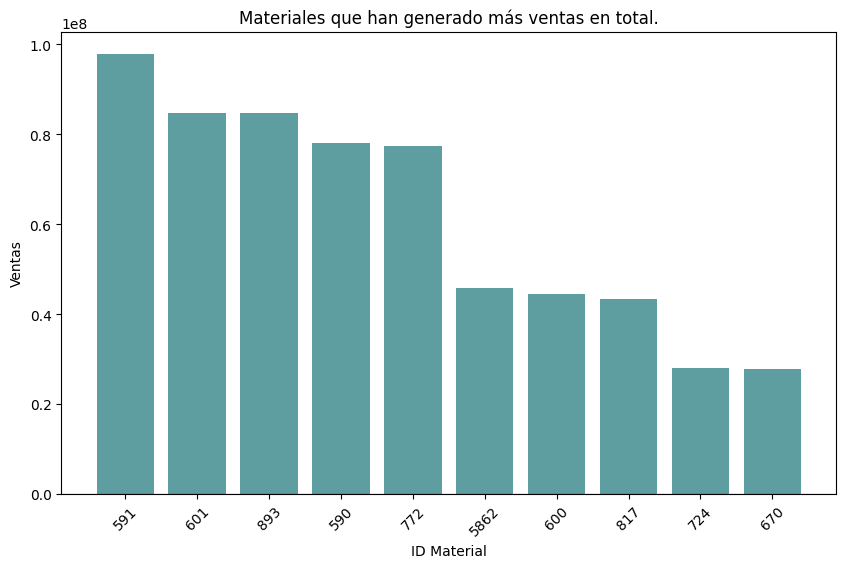

In [ ]:
top_10_ventas = ventastot.head(10)

# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(top_10_ventas['id_material'].astype(str), top_10_ventas['ventas totales'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado más ventas en total.')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

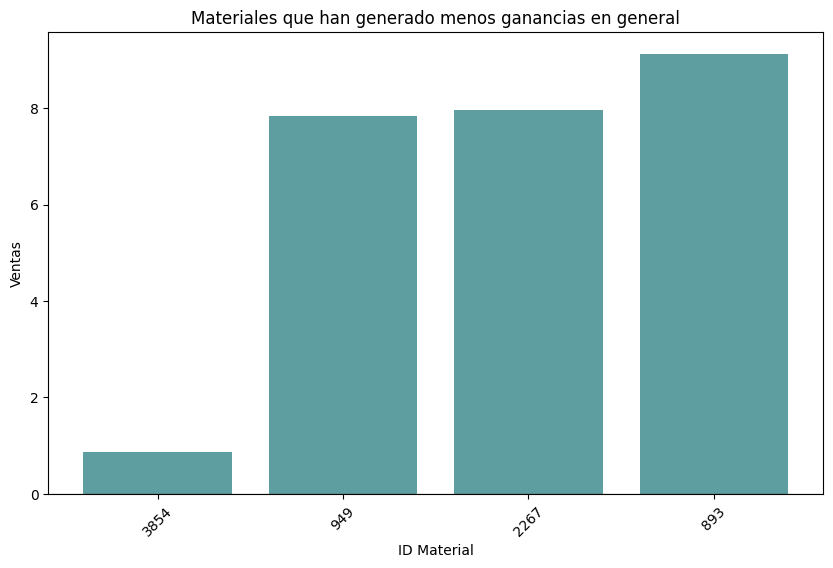

In [ ]:
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(ventasbajas['id_material'].astype(str), ventasbajas['ventas'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado menos ganancias en general')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

# Datos por ventas el 7 de Agosto de 2024

Id del material ordenado por el mayor número de dinero conseguido el 7 de Agosto de 2024

In [ ]:
fechas=df.sort_values(by='fecha', ascending=False)
fechas=fechas.reset_index(drop=True)
fechas.head(10)

,fecha,id_material,id_cliente,ventas
0,2024-08-07,772,7517,1047.200000000
1,2024-08-07,590,7569,647.280000000
2,2024-08-07,591,7935,2548.800000000
3,2024-08-07,816,7935,3308.000000000
4,2024-08-07,875,7517,300.700000000
5,2024-08-07,599,7517,1048.320000000
6,2024-08-07,6156,7517,465.800000000
7,2024-08-07,594,7517,1294.560000000
8,2024-08-07,741,7935,8791.600000000
9,2024-08-07,883,7517,1127.350000000


In [ ]:
fechasgan=fechas[fechas["fecha"]=="2024-08-07"]
fechasgan=fechasgan.sort_values(by='ventas', ascending=False)
fechasgan=fechasgan.reset_index(drop=True)
fechasgan.head(10)

,fecha,id_material,id_cliente,ventas
0,2024-08-07,741,7935,8791.600000000
1,2024-08-07,601,7517,3398.400000000
2,2024-08-07,3492,7602,3321.500000000
3,2024-08-07,816,7935,3308.000000000
4,2024-08-07,591,7935,2548.800000000
5,2024-08-07,670,7517,2441.500000000
6,2024-08-07,591,7517,2124.000000000
7,2024-08-07,595,7517,1699.200000000
8,2024-08-07,590,7517,1294.560000000
9,2024-08-07,600,7517,1294.560000000


In [ ]:
fechasper=fechas[fechas["fecha"]=="2024-08-07"]
fechasper=fechasper.sort_values(by='ventas', ascending=True)
fechasper=fechasper.reset_index(drop=True)
fechasper.head(10)

,fecha,id_material,id_cliente,ventas
0,2024-08-07,2201,7517,270.400000000
1,2024-08-07,875,7517,300.700000000
2,2024-08-07,6291,7517,442.400000000
3,2024-08-07,6156,7517,465.800000000
4,2024-08-07,773,7517,538.500000000
5,2024-08-07,590,7569,647.280000000
6,2024-08-07,761,7935,790.800000000
7,2024-08-07,4115,7935,886.000000000
8,2024-08-07,1030,7517,1046.750000000
9,2024-08-07,772,7517,1047.200000000


In [ ]:
fechasmen = fechasper[fechasper["ventas"] > 0]
fechasmen.head(10)

,fecha,id_material,id_cliente,ventas
0,2024-08-07,2201,7517,270.400000000
1,2024-08-07,875,7517,300.700000000
2,2024-08-07,6291,7517,442.400000000
3,2024-08-07,6156,7517,465.800000000
4,2024-08-07,773,7517,538.500000000
5,2024-08-07,590,7569,647.280000000
6,2024-08-07,761,7935,790.800000000
7,2024-08-07,4115,7935,886.000000000
8,2024-08-07,1030,7517,1046.750000000
9,2024-08-07,772,7517,1047.200000000


# Datos por ventas en fecha más reciente

Id de los 10 materiales con más ganancias generadas en ventas recientes

In [ ]:

ventasporproductoN=[]
fechareciente=[]
for i in range (len(setventas)):
  ventanueva=fechas[fechas["id_material"] == setventas[i]].index.min()
  ventasporproductoN.append(fechas["ventas"][ventanueva])
  fechareciente.append(fechas["fecha"][ventanueva])


ventastotN = {
  "id_material": setventas,
  "fecha más reciente de activación": fechareciente,
  "ventas en fecha más reciente": ventasporproductoN
}
ventastotN=pd.DataFrame.from_dict(ventastotN)
ventastotN = ventastotN.sort_values(by='ventas en fecha más reciente', ascending=False)
ventastotN = ventastotN.reset_index(drop=True)
ventastotN.head(10)

,id_material,fecha más reciente de activación,ventas en fecha más reciente
0,798,2024-07-27,98900.000000000
1,1571,2022-08-05,96578.400000000
2,6055,2024-07-26,82255.000000000
3,2398,2021-04-24,78112.350000000
4,1618,2024-08-03,60688.800000000
5,4221,2022-10-19,55011.600000000
6,4979,2021-03-12,54613.200000000
7,2589,2024-01-26,52504.800000000
8,2807,2024-06-21,50960.000000000
9,793,2024-07-09,45708.030000000


Id de los 10 materiales con más perdidas generadas en ventas recientes

In [ ]:

ventasporproductoN=[]
fechareciente=[]
for i in range (len(setventas)):
  ventanueva=fechas[fechas["id_material"] == setventas[i]].index.min()
  ventasporproductoN.append(fechas["ventas"][ventanueva])
  fechareciente.append(fechas["fecha"][ventanueva])


ventastotN = {
  "id_material": setventas,
  "fecha más reciente de activación": fechareciente,
  "ventas en fecha más reciente": ventasporproductoN
}
ventastotN=pd.DataFrame.from_dict(ventastotN)
ventastotNPer = ventastotN.sort_values(by='ventas en fecha más reciente', ascending=True)
ventastotNPer = ventastotNPer.reset_index(drop=True)
ventastotNPer.head(10)

,id_material,fecha más reciente de activación,ventas en fecha más reciente
0,5084,2021-09-27,-181256.000000000
1,699,2024-08-02,-158578.560000000
2,842,2024-08-02,-24855.000000000
3,976,2021-07-03,-17971.500000000
4,4455,2023-09-15,-16185.000000000
5,705,2022-06-22,-12928.000000000
6,2409,2024-08-02,-8573.400000000
7,593,2022-09-02,-7858.800000000
8,1600,2024-05-21,-7844.000000000
9,2133,2021-06-04,-7680.000000000


Id de los 10 materiales con menos ganancias generadas en ventas recientes

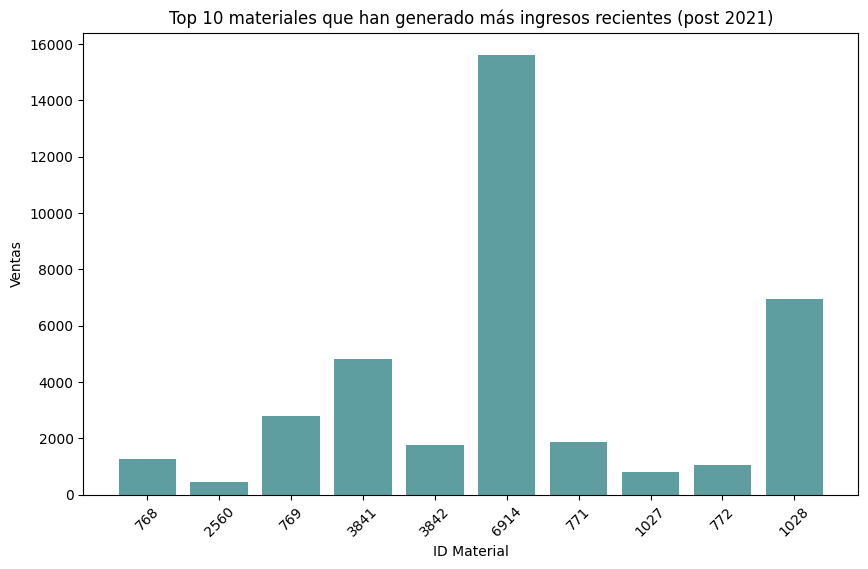

In [ ]:
import pandas as pd
md = ventastotN.head(10)
dfmd = pd.DataFrame(md)
dfmd
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(dfmd['id_material'].astype(str), dfmd['ventas en fecha más reciente'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Top 10 materiales que han generado más ingresos recientes (post 2021)')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

In [ ]:
ventastotNMen = ventastotNPer[ventastotNPer["ventas en fecha más reciente"] > 0]
ventastotNMen = ventastotNMen.reset_index(drop=True)
ventastotNMen.head(10)

,id_material,fecha más reciente de activación,ventas en fecha más reciente
0,2824,2022-07-12,40.960000000
1,2825,2022-08-23,40.960000000
2,2379,2022-05-10,87.980000000
3,864,2024-07-25,101.540000000
4,2268,2022-10-12,103.960000000
5,674,2024-07-30,104.720000000
6,706,2022-07-15,111.120000000
7,4884,2022-07-18,115.230000000
8,1757,2024-07-24,121.790000000
9,6127,2023-06-05,126.000000000


# Id material

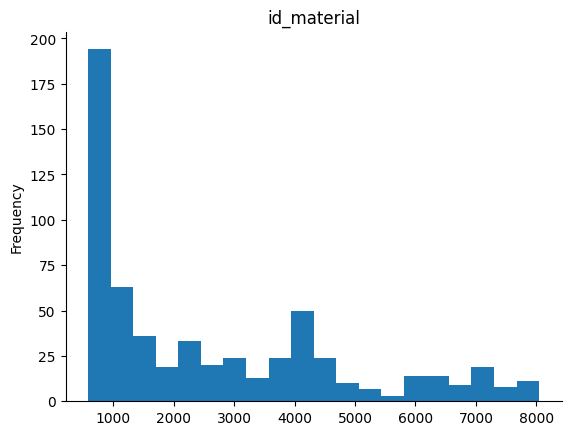

In [ ]:
# @title id_material

from matplotlib import pyplot as plt
ventastotN['id_material'].plot(kind='hist', bins=20, title='id_material')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Datos por ventas después de 2023

Productos con mejores totales con fecha de activacion reciente (Después de 2023)

In [ ]:
ventastotN['fecha más reciente de activación'] = pd.to_datetime(ventastotN['fecha más reciente de activación'])

productos_nuevos = ventastotN[ventastotN['fecha más reciente de activación'] >= pd.to_datetime('2023-01-01')]
productos_nuevos = productos_nuevos.sort_values(by='ventas en fecha más reciente', ascending=False)
productos_nuevos.reset_index(drop=True)
top_productos_nuevos = productos_nuevos.head(10)

top_productos_nuevos

,id_material,fecha más reciente de activación,ventas en fecha más reciente
72,798,2024-07-27,98900.000000000
376,6055,2024-07-26,82255.000000000
177,1618,2024-08-03,60688.800000000
71,2589,2024-01-26,52504.800000000
576,2807,2024-06-21,50960.000000000
58,793,2024-07-09,45708.030000000
41,4113,2024-06-21,43354.000000000
281,3701,2024-06-13,35832.000000000
429,957,2024-08-02,33030.800000000
374,6054,2024-06-13,32973.160000000


Productos con mayores pérdidas con fecha de activacion reciente (Después de 2023)

In [ ]:
productos_nuevosper = productos_nuevos.sort_values(by='ventas en fecha más reciente', ascending=True)
top_productos_nuevosper = productos_nuevosper.head(10)

top_productos_nuevosper

,id_material,fecha más reciente de activación,ventas en fecha más reciente
423,699,2024-08-02,-158578.560000000
162,842,2024-08-02,-24855.000000000
225,4455,2023-09-15,-16185.000000000
231,2409,2024-08-02,-8573.400000000
145,1600,2024-05-21,-7844.000000000
240,1388,2024-08-02,-6052.000000000
298,636,2023-12-05,-5871.600000000
92,7207,2024-08-02,-4401.000000000
255,4207,2024-08-02,-3836.650000000
408,2741,2024-08-01,-3720.390000000


Productos con menores ventas con fecha de activacion reciente (Después de 2023)

In [ ]:
productos_nuevosmen= productos_nuevosper[productos_nuevosper["ventas en fecha más reciente"] > 0]
productos_nuevosmen.head()

,id_material,fecha más reciente de activación,ventas en fecha más reciente
203,864,2024-07-25,101.540000000
366,674,2024-07-30,104.720000000
518,1757,2024-07-24,121.790000000
557,6127,2023-06-05,126.000000000
189,2135,2024-07-11,131.860000000


#Datos por ventas antes de 2022

Productos con última venta previa a 2022 con mayores ingresos generados

In [ ]:
ventastotN['fecha más reciente de activación'] = pd.to_datetime(ventastotN['fecha más reciente de activación'])
productos_antiguos = ventastotN[ventastotN['fecha más reciente de activación'] < pd.to_datetime('2022-01-01')]

productos_antiguos = productos_antiguos.sort_values(by='ventas en fecha más reciente', ascending=False)
top_productos_antiguos = productos_antiguos.head(10)

top_productos_antiguos

,id_material,fecha más reciente de activación,ventas en fecha más reciente
198,2398,2021-04-24,78112.350000000
275,4979,2021-03-12,54613.200000000
224,1383,2021-10-01,28595.520000000
407,1717,2021-02-16,18908.000000000
290,4216,2021-12-26,12979.200000000
416,1720,2021-11-04,10400.000000000
414,4535,2021-12-10,8736.000000000
246,4461,2021-02-17,8026.200000000
282,4469,2021-08-17,7836.400000000
456,709,2021-11-04,5519.700000000


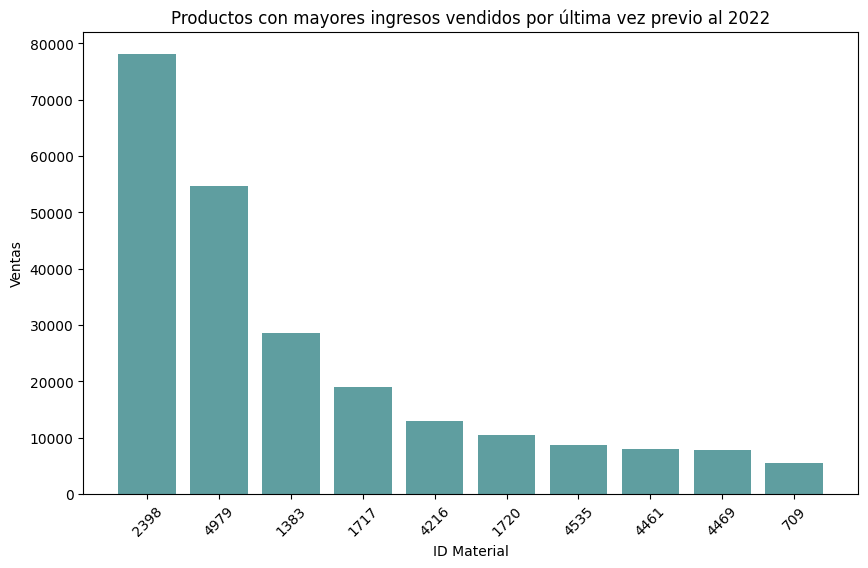

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_productos_antiguos['id_material'].astype(str), top_productos_antiguos['ventas en fecha más reciente'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Productos con mayores ingresos vendidos por última vez previo al 2022')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Productos con última venta previa a 2022 con mayores pérdidas

In [ ]:
productos_antiguosPer = productos_antiguos.sort_values(by='ventas en fecha más reciente', ascending=True)
top_productos_antiguosPer = productos_antiguosPer.head(10)

top_productos_antiguosPer

,id_material,fecha más reciente de activación,ventas en fecha más reciente
515,5084,2021-09-27,-181256.000000000
481,976,2021-07-03,-17971.500000000
184,2133,2021-06-04,-7680.000000000
302,1661,2021-04-26,-7290.000000000
401,2227,2021-03-05,-4440.010000000
77,4386,2021-09-27,-1812.560000000
412,695,2021-05-20,-782.400000000
280,2421,2021-08-24,-61.400000000
324,1416,2021-05-07,187.020000000
218,614,2021-12-15,283.680000000


Productos con última venta previa a 2022 con menores ingresos generados

In [ ]:

productos_antiguosMen = productos_antiguosPer[productos_antiguosPer["ventas en fecha más reciente"] > 0]
top_productos_antiguosqMen = productos_antiguosMen.head(10)

top_productos_antiguosqMen

,id_material,fecha más reciente de activación,ventas en fecha más reciente
324,1416,2021-05-07,187.020000000
218,614,2021-12-15,283.680000000
463,3270,2021-12-20,293.350000000
59,794,2021-06-11,440.940000000
397,3505,2021-05-21,536.920000000
67,796,2021-02-25,546.100000000
329,2189,2021-12-02,549.800000000
459,5061,2021-11-05,556.900000000
322,1415,2021-03-03,561.060000000
534,739,2021-03-25,715.470000000


# Datos de clientes

Valor de vida por cliente

In [ ]:
df['ventas'] = df['ventas'].astype(float)

df['fecha'] = pd.to_datetime(df['fecha'])
dinero_promedio = df.groupby('id_cliente')['ventas'].mean()
frecuencia_compras = df.groupby('id_cliente')['ventas'].count()

df['mes'] = df['fecha'].dt.to_period('M')
periodos_actividad = df.groupby('id_cliente')['mes'].nunique()
frecuencia_promedio = frecuencia_compras / periodos_actividad

valor_cliente = dinero_promedio * frecuencia_promedio
top_clientes = valor_cliente.sort_values(ascending=False).head(10)

top_clientes

,0
id_cliente,
8342,6.868963e+06
8635,1.896584e+06
7713,1.511704e+06
9066,9.414652e+05
7806,9.107584e+05
8318,8.055363e+05
3400,7.440576e+05
8884,7.114588e+05
7997,6.100412e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227725 entries, 10 to 830516
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        227725 non-null  datetime64[ns]
 1   id_material  227725 non-null  int64         
 2   id_cliente   227725 non-null  int64         
 3   ventas       227725 non-null  float64       
 4   mes          227725 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), period[M](1)
memory usage: 10.4 MB


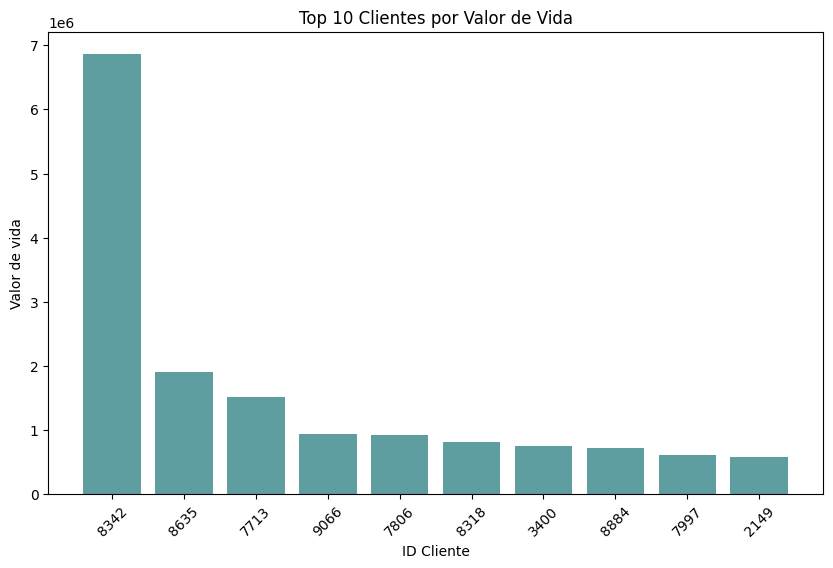

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_clientes.index.astype(str), top_clientes.values, color='cadetblue') # Use .index and .values

# Añadir título y etiquetas de ejes
plt.title('Top 10 Clientes por Valor de Vida') # Changed title to reflect the data
plt.xlabel('ID Cliente')
plt.ylabel('Valor de vida')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Las propiedades que deben de tener las cadenas de Markov para que convergan son:


*   Irreducibilidad.
\n Se debe de poder acceder a cualquier estado partiendo de otro, en otras palabras, debe de existir una secuencia de pasos finita que nos permita pasar de un estado a otro.
*   Aperiodicidad.
\n Ningún estado debe de tener un periodo mayor a uno
*   Positividad
\n Todas las entradas deben de ser estrictamente positivas, es decir, no puede existir una probabilidad nula de pasar de cualquier estado a otro.
  



# Estadísticas de cada variable

Primero, creamos un diccionario con cada variable analizada

In [ ]:
fechas_cleaned = fechas.drop_duplicates(subset='id_material', keep='first')
fechas_cleaned = fechas_cleaned.reset_index(drop=True)
fechas_cleaned.head(10)

valor_cliente2 = pd.DataFrame(valor_cliente)
valor_cliente2

variable_dict = {}

variable_dict[0] = df["ventas"]
variable_dict[1]= ventastot["ventas totales"]
variable_dict[2]= fechas_cleaned["ventas"]
variable_dict[3]= productos_nuevos["ventas en fecha más reciente"]
variable_dict[4]=productos_antiguos["ventas en fecha más reciente"]
variable_dict[5]=valor_cliente2[0]

for i in range (len(variable_dict)):
  for j in range (len(variable_dict[i])):
          # Example
      variable_dict[i] = variable_dict[i].copy()  # If you need to make a copy and modify it
      variable_dict[i].iloc[j] = float(variable_dict[i].iloc[j])


Después, creamos un dataframe con cada estadístico relevante

In [ ]:
from scipy.stats import skew
import statistics
import numpy as np
import scipy.stats as ss
estadisticasvariable=[]

for i in range (6):
    mean= sum(variable_dict[i])/len(variable_dict[i])
    quartiles= statistics.quantiles(variable_dict[i], n=4)
    quartiles = [round(q, 2) for q in quartiles]
    mode= statistics.mode(variable_dict[i])
    variance=statistics.variance(variable_dict[i])
    standarddev=statistics.stdev(variable_dict[i])
    rango=max(variable_dict[i])-min(variable_dict[i])
    rangoquartiles=[np.percentile(variable_dict[i], 25),np.percentile(variable_dict[i], 50),np.percentile(variable_dict[i], 75)]
    rangoquartiles = [round(q, 2) for q in rangoquartiles]
    skewness=variable_dict[i].skew()
    cv=np.std(variable_dict[i], ddof=1) / np.mean(variable_dict[i]*100)
    kurtosis=variable_dict[i].kurtosis()

    estadisticastemp=[str(round(mean,2)),quartiles,round(mode,2),round(variance,2),round(standarddev,2),round(rango,2),rangoquartiles,round(skewness,2),round(cv,2),round(kurtosis,2)]
    estadisticasvariable.append(estadisticastemp)

estadisticasnumericas = pd.DataFrame(
{"Ventas sin modificar" : estadisticasvariable[0],
"Ventas totales de cada material" : estadisticasvariable[1],
"Ventas más recientes de cada material" : estadisticasvariable[2],
"Ventas realizadas después de 2023" : estadisticasvariable[3],
"Ventas realizadas antes de 2022" : estadisticasvariable[4],
"Valores de vida por cliente" : estadisticasvariable[5]},
index = ["Media", "Cuartiles", "Moda" , "Varianza","Desviación Estandar","Rango","Rango intercuartil", "Coeficiente de Asimetría",
         "Coeficiente de Variación", "Curtosis"])

estadisticasnumericas = estadisticasnumericas.style.set_caption("Datos")

display(estadisticasnumericas)


,Ventas sin modificar,Ventas totales de cada material,Ventas más recientes de cada material,Ventas realizadas después de 2023,Ventas realizadas antes de 2022,Valores de vida por cliente
Media,6128.34,2345507.4,4873.34,5047.84,1102.67,225646.3
Cuartiles,"[988.8, 2373.5, 5400.0]","[32340.0, 199576.3, 1005026.14]","[803.84, 2054.42, 6001.6]","[913.65, 2228.75, 6096.0]","[330.25, 1022.85, 4936.86]","[34128.46, 92275.63, 242597.44]"
Moda,3052.800000,0.000000,4262.400000,4262.400000,78112.350000,51570.300000
Varianza,500486871.180000,81208553441059.171875,225519933.230000,152755831.930000,1025952582.250000,348253805639.289978
Desviación Estandar,22371.560000,9011578.850000,15017.320000,12359.440000,32030.490000,590130.330000
Rango,3171758.280000,97903712.020000,280156.000000,257478.560000,259368.350000,6868144.770000
Rango intercuartil,"[988.8, 2373.5, 5400.0]","[32395.22, 199576.3, 983653.95]","[808.69, 2054.42, 5942.35]","[919.35, 2228.75, 6064.0]","[404.04, 1022.85, 3905.89]","[34519.49, 92275.63, 239586.13]"
Coeficiente de Asimetría,21.910000,7.380000,-3.640000,-2.530000,-4.030000,9.440000
Coeficiente de Variación,0.040000,0.040000,0.030000,0.020000,0.290000,0.030000
Curtosis,1261.540000,62.080000,69.720000,73.200000,26.000000,103.850000


# Probabilidades

Estadísticas de los materiales con mayores ventas por criterio

In [ ]:
FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventastot["id_material"].iloc[0]
winner[1]=fechas["id_material"].iloc[0]
winner[2]=ventastotN["id_material"].iloc[0]
winner[3]=top_productos_nuevos["id_material"].iloc[0]
winner[4]=top_productos_antiguos["id_material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=float(winner[i])
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['id_material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['id_material'].tolist() and material not in ventasporfecha2['id_material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con más ventas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con más ventas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con más ventas,591,772,768,798,2398
Número de transiciónes de Activado a Activado,1089,1125,159,0,0
Número de transiciónes de Activado a Desactivado,50,16,1,6,4
Número de transiciónes de Desactivado a Activado,49,15,0,5,3
Número de transiciónes de Desactivado a Desactivado,35,67,1063,589,1032
Número total de Activaciones,1139,1141,160,6,4
Número total de Desactivaciones,84,82,1063,594,1035
Prob. de transiciónes de Activado a Activado,95.6102%,98.5977%,99.375%,0%,0%
Prob. de transiciónes de Activado a Desactivado,4.3898%,1.4023%,0.625%,100.0%,100.0%
Prob. de transiciónes de Desactivado a Activado,58.3333%,18.2927%,0%,0.8418%,0.2899%


Estadísticas de los materiales con mayores perdidas por criterio

In [ ]:
ventastot["id_material"].iloc[-1]

2934

In [ ]:
winner={}
winner[0]=bottom_10_ventas_df["id_material"].iloc[0]
winner[1]=fechasper["id_material"].iloc[0]
winner[2]=ventastotNPer["id_material"].iloc[0]
winner[3]=top_productos_nuevosper["id_material"].iloc[0]
winner[4]=top_productos_antiguosPer["id_material"].iloc[0]
winner[5]=top_clientes.index[-1]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=float(winner[i])
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['id_material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['id_material'].tolist() and material not in ventasporfecha2['id_material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con mayores pérdidas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con mayores pérdidas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con mayores pérdidas,6435,2201,5084,699,5084
Número de transiciónes de Activado a Activado,455,516,0,341,0
Número de transiciónes de Activado a Desactivado,258,257,4,275,4
Número de transiciónes de Desactivado a Activado,257,256,3,274,3
Número de transiciónes de Desactivado a Desactivado,253,193,765,332,765
Número total de Activaciones,713,773,4,616,4
Número total de Desactivaciones,510,449,768,606,768
Prob. de transiciónes de Activado a Activado,63.8149%,66.7529%,0%,55.3571%,0%
Prob. de transiciónes de Activado a Desactivado,36.1851%,33.2471%,100.0%,44.6429%,100.0%
Prob. de transiciónes de Desactivado a Activado,50.3922%,57.0156%,0.3906%,45.2145%,0.3906%


Estadísticas de los materiales con menores ventas por criterio

In [ ]:

FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventasbajas["id_material"].iloc[0]
winner[1]=fechasmen["id_material"].iloc[0]
winner[2]=ventastotNMen["id_material"].iloc[0]
winner[3]=top_productos_nuevos["id_material"].iloc[0]
winner[4]=productos_nuevosmen["id_material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=float(winner[i])
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['id_material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['id_material'].tolist() and material not in ventasporfecha2['id_material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['id_material'].tolist() and material in ventasporfecha2['id_material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con menos ventas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con menos ventas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con menos ventas,3854,2201,2824,798,864
Número de transiciónes de Activado a Activado,725,516,0,0,4
Número de transiciónes de Activado a Desactivado,174,257,28,6,66
Número de transiciónes de Desactivado a Activado,173,256,27,5,65
Número de transiciónes de Desactivado a Desactivado,150,193,1052,589,1069
Número total de Activaciones,899,773,28,6,70
Número total de Desactivaciones,323,449,1079,594,1134
Prob. de transiciónes de Activado a Activado,80.6452%,66.7529%,0%,0%,5.7143%
Prob. de transiciónes de Activado a Desactivado,19.3548%,33.2471%,100.0%,100.0%,94.2857%
Prob. de transiciónes de Desactivado a Activado,53.5604%,57.0156%,2.5023%,0.8418%,5.7319%


Estadísticas del cliente con mayor valor de vida

In [ ]:
FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventastot["id_material"].iloc[0]
winner[1]=fechas["id_material"].iloc[0]
winner[2]=ventastotN["id_material"].iloc[0]
winner[3]=top_productos_nuevos["id_material"].iloc[0]
winner[4]=top_productos_antiguos["id_material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

P0=0
P1=1
P00=0
P01=0
P10=0
P11=0
material=float(winner[5])
PrincipioVentas=False
for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['id_cliente'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['id_cliente'].tolist() and material in ventasporfecha2['id_cliente'].tolist():
              P00 += 1
              P0 +=1
          elif material in ventasporfecha['id_cliente'].tolist() and material not in ventasporfecha2['id_cliente'].tolist():
              P01 += 1
              P0 +=1
          elif material not in ventasporfecha['id_cliente'].tolist() and material in ventasporfecha2['id_cliente'].tolist():
              P10 += 1
              P1 +=1
          else:
              P11 += 1
              P1 +=1

P0=P00+P01
P1=P10+P11
if P00 != 0:
    totP00=P00/P0
else:
    totP00=0
if P01 != 0:
      totP01=P01/P0
else:
    totP01=0
if P10 != 0:
      totP10=P10/P1
else:
    totP10=0
if P11 != 0:
      totP11=P11/P1
else:
    toptP11=0
estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"Transiciones del cliente con más ventas" : estadisticasvariable[0]},
index = ["ID del material ganador",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])
display(estadisticasgganadores)

,Transiciones del cliente con más ventas
ID del material ganador,8342
Número de transiciónes de Activado a Activado,541
Número de transiciónes de Activado a Desactivado,248
Número de transiciónes de Desactivado a Activado,247
Número de transiciónes de Desactivado a Desactivado,187
Número total de Activaciones,789
Número total de Desactivaciones,434
Prob. de transiciónes de Activado a Activado,68.5678%
Prob. de transiciónes de Activado a Desactivado,31.4322%
Prob. de transiciónes de Desactivado a Activado,56.9124%


Estadísticas del cliente con mayor valor de vida

In [ ]:


estadisticasvariable=[]
ganancias=0
perdidas=0
ventasganador=ventasganador=df[df['id_cliente'] == winner[5]]["ventas"]
for j in range (len(ventasganador)):
    if ventasganador.iloc[j]>0:
      ganancias+=1
    else:
      perdidas+=1
probganancias=ganancias/len(ventasganador)
probperdidas=perdidas/len(ventasganador)
estadisticastemp=[winner[i],ganancias, perdidas, str(round(probganancias*100,4))+"%", str(round(probperdidas*100,4))+"%",
                    str(round(probganancias*probganancias*100,4))+"%", str(round(probganancias*probperdidas*100,4))+"%",
                    str(round(probperdidas*probganancias*100,4))+"%", str(round(probperdidas*probperdidas*100,4))+"%"]
estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"Estadísticas del cliente con mayor valor de vida" : estadisticasvariable[0]},
index = ["ID del cliente",
         "Número de ventas con ganancias", "Número de ventas con pérdidas" ,
         "Probabilidad de obtener ganancias","Probabilidad de obtener pérdidas",
         "Prob. ganar y después ganar","Prob. ganar y después perder",
         "Prob. perder y después ganar", "Prob. perder y después perder"])

display(estadisticasgganadores)


,Estadísticas del cliente con mayor valor de vida
ID del cliente,8342
Número de ventas con ganancias,9602
Número de ventas con pérdidas,681
Probabilidad de obtener ganancias,93.3774%
Probabilidad de obtener pérdidas,6.6226%
Prob. ganar y después ganar,87.1934%
Prob. ganar y después perder,6.184%
Prob. perder y después ganar,6.184%
Prob. perder y después perder,0.4386%
